In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
data= pd.read_csv("/content/drive/MyDrive/My_Data/Bone supplement market segmentation/Dataset.csv")

In [96]:
data.head(11)

,Unnamed: 0,State,District,Population,Children_Between_1_to_2_years,Total_Arthritis_Patient,Arthritis_Patient_Male,Arthritis_Patient_Female,Children_Vaccinated,Children_Immunized,Children_Vaccinated_at_Birth,Children_Not_Vaccinated,Total_Children_Weighted,Children_Weighted_less_than_2.5_Kg,Women_Aged_15_49_years,Children_Breastfed_Total,Children_Received_Foods_Other_Than_Breast_Milk_Total,Children_Received_Ifa_Tablets_Syrup_Last_3_Months_Total
0,0,Assam,Barpeta,64606,2371,1072.0,832.0,1328.0,76.5,62.1,67.7,4.3,55.3,22.5,12208.5,36.1,41.6,36.1
1,1,Assam,Bongaigaon,84012,2451,929.0,701.0,1171.0,67.8,52.4,73.7,3.4,55.7,21.6,16157.0,29.1,50.1,30.3
2,2,Assam,Cachar,127158,5709,2964.0,2448.0,3474.0,71.3,64.5,82.0,2.7,61.7,27.8,22614.5,32.3,58.8,19.9
3,3,Assam,Darrang,29048,984,1557.0,1360.0,1766.0,79.3,56.4,76.3,5.3,65.0,25.2,5225.5,31.5,44.5,24.4
4,4,Assam,Dhemaji,75451,3467,1109.0,958.0,1265.0,80.4,66.6,78.5,7.5,74.1,14.5,13844.0,43.1,26.3,21.9
5,5,Assam,Dhubri,50992,1556,1935.0,1732.0,2149.0,72.5,48.7,61.8,7.8,41.7,16.5,9817.0,23.8,54.8,31.9
6,6,Assam,Dibrugarh,97268,3509,5175.0,4551.0,5828.0,90.6,82.3,93.7,0.9,81.8,31.6,18706.5,74.9,11.5,17.2
7,7,Assam,Goalpara,75890,3009,1638.0,1367.0,1928.0,72.2,46.6,72.1,4.5,57.6,18.4,14795.0,39.2,37.1,41.0
8,8,Assam,Golaghat,72165,2387,7202.0,6482.0,7945.0,76.9,69.4,80.5,1.4,75.5,24.7,13803.5,55.3,27.9,17.1
9,9,Assam,Hailakandi,13892,660,3660.0,3133.0,4207.0,74.1,67.1,80.1,7.4,36.9,28.2,2384.0,18.5,66.1,27.2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 18 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Unnamed: 0                                               284 non-null    int64  
 1   State                                                    284 non-null    object 
 2   District                                                 284 non-null    object 
 3   Population                                               284 non-null    int64  
 4   Children_Between_1_to_2_years                            284 non-null    int64  
 5   Total_Arthritis_Patient                                  284 non-null    float64
 6   Arthritis_Patient_Male                                   284 non-null    float64
 7   Arthritis_Patient_Female                                 284 non-null    float64
 8   Children_Vaccinated           

# **EDA**

**Total Population vs Total Arthritis patients**

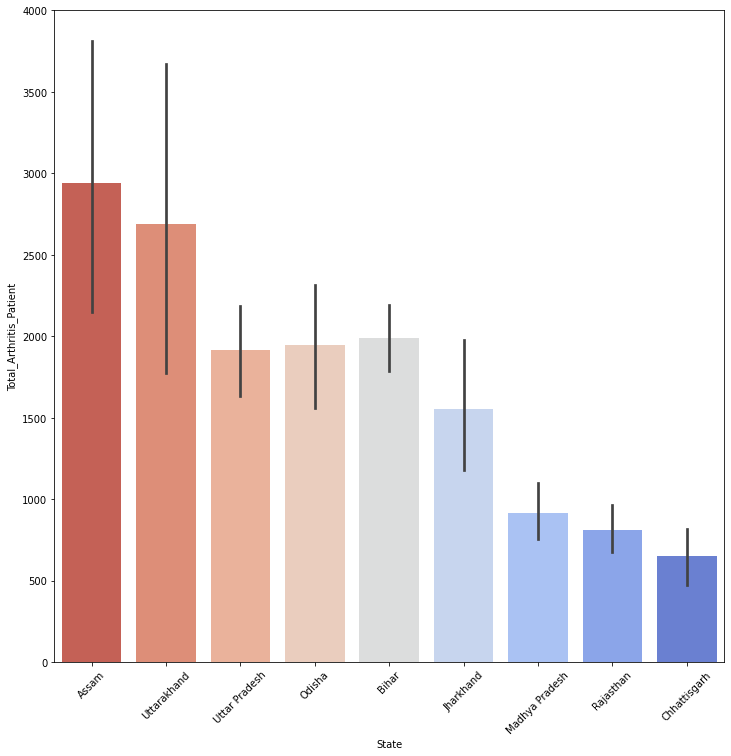

In [113]:
plt.figure(figsize=(12,12))
sns.barplot(x='State',data=data.sort_values("Total_Arthritis_Patient",ascending=False),y="Total_Arthritis_Patient",palette='coolwarm_r')
plt.xticks(rotation=45)
plt.show()

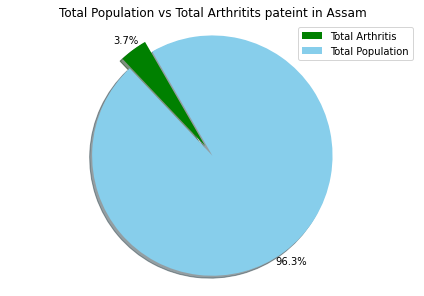

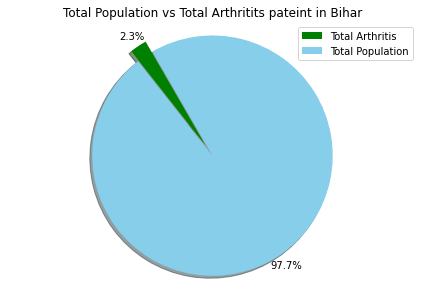

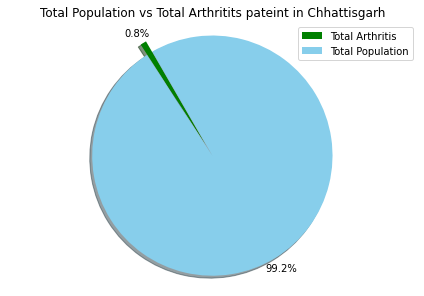

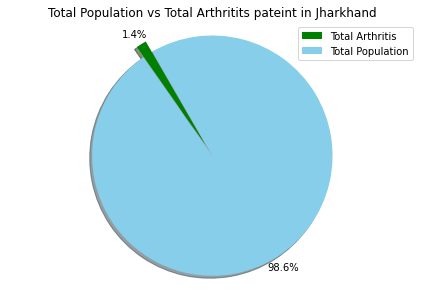

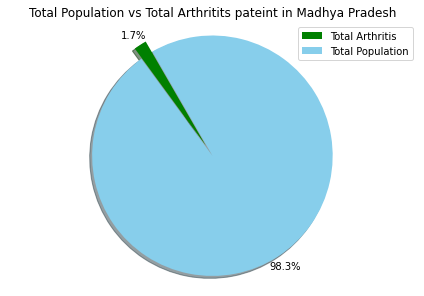

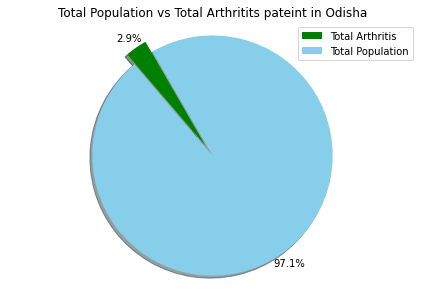

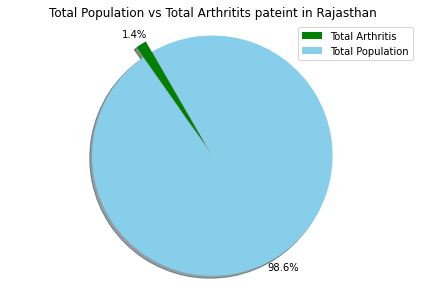

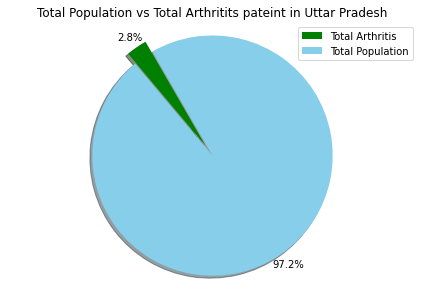

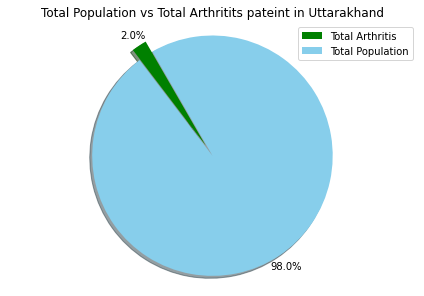

In [67]:
for state in data.State.unique():
  val = data[data['State']== state].Total_Arthritis_Patient.sum()/data[data['State']== state].Population.sum()
  x = [val*100,(1-val)*100]
  labels = ['Total Arthritis', 'Total Population']
  colors = ['green', 'skyblue']
  explode = (0, 0.1,)
  plt.pie(x, colors=colors,explode=explode, shadow=True,startangle=120, pctdistance=1.1,labeldistance=0.6, autopct='%1.1f%%')
  plt.legend(labels, loc="upper right")
  plt.axis('equal')
  plt.tight_layout()
  plt.title('Total Population vs Total Arthritits pateint in {}'.format(state))
  plt.show()

**Total Population vs  Arthritis patients Female/Male**

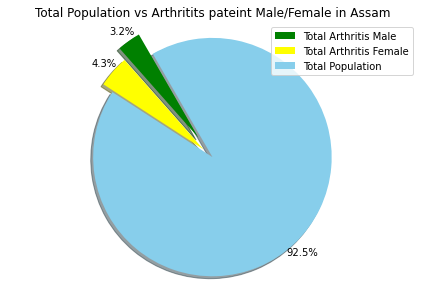

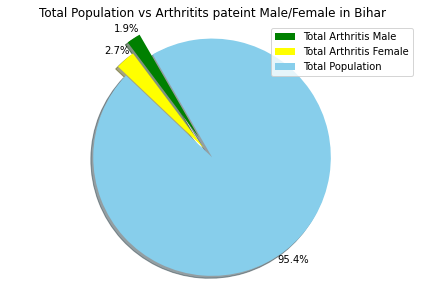

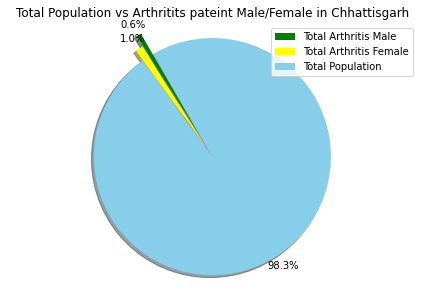

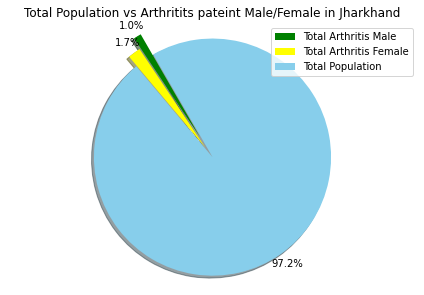

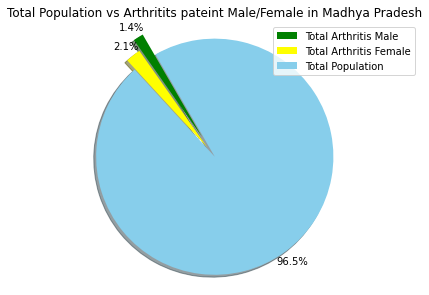

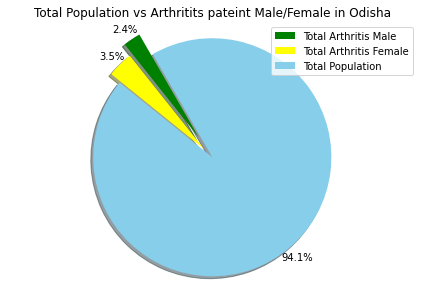

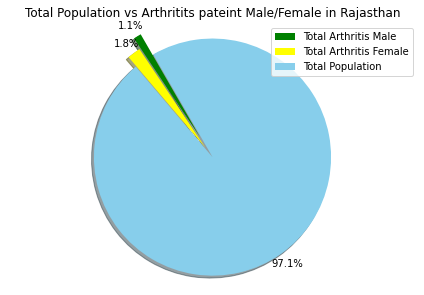

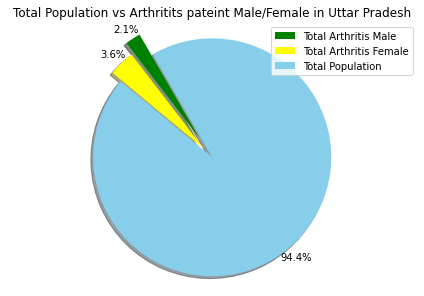

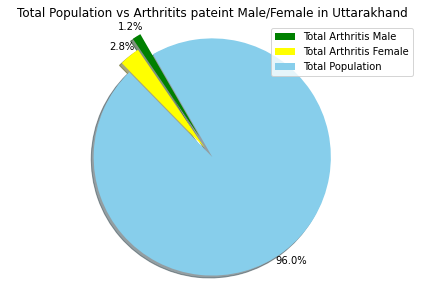

In [68]:
for state in data.State.unique():
  val1 = data[data['State']== state].Arthritis_Patient_Male.sum()/data[data['State']== state].Population.sum()
  val2 = data[data['State']== state].Arthritis_Patient_Female.sum()/data[data['State']== state].Population.sum()
  x = [val1*100,val2*100,(1-val1-val2)*100]
  labels = ['Total Arthritis Male','Total Arthritis Female', 'Total Population']
  colors = ['green','yellow', 'skyblue']
  explode = (0.2, 0.1,0)
  plt.pie(x, colors=colors,explode=explode, shadow=True,startangle=120, pctdistance=1.1,labeldistance=0.6, autopct='%1.1f%%')
  plt.legend(labels, loc="upper right")
  plt.axis('equal')
  plt.tight_layout()
  plt.title('Total Population vs Arthritits pateint Male/Female in {}'.format(state))
  plt.show()

**Top 20 districts to have most Arthritis Patients**

In [98]:
#New data
new_data= data.sort_values(["Total_Arthritis_Patient"], axis=0,ascending=[False])

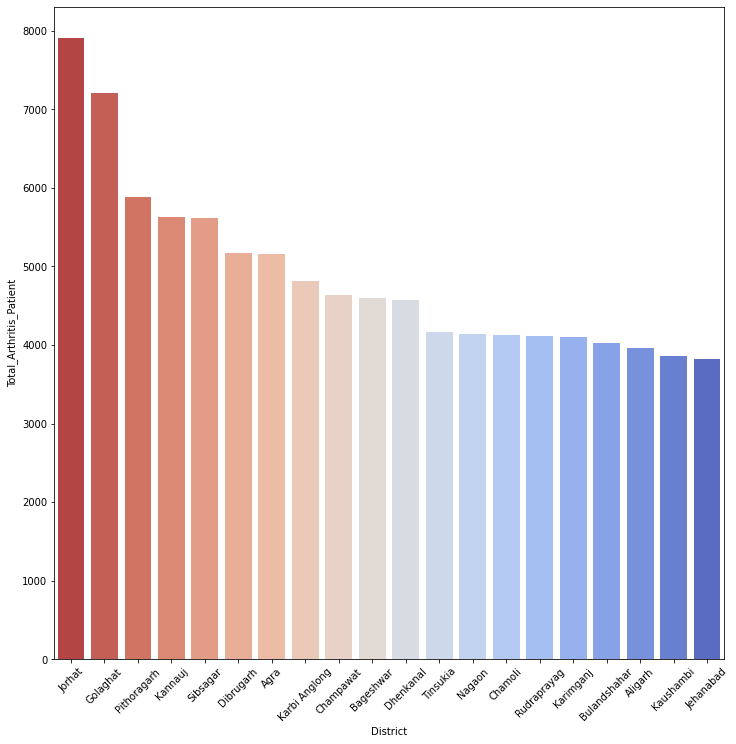

In [115]:
#Plot grapgh
plt.figure(figsize=(12,12))
sns.barplot(x="District",y='Total_Arthritis_Patient',data=new_data[:20],palette="coolwarm_r")
plt.xticks(rotation=45)
plt.show()

***Observations :***

* From the first figures we see that **Assam, Bihar, Odisha, Uttar Pradesh,** has most number of Arthiritis patients.
* From the 2nd figure we conclude that Female population is most affected by Arthiritis compared to Male population
* 3rd figure shows the top 20 Districts with most Arthiritis patients.



**From the above analysis we understand that the above mentioned State along with top 20 districts can give us a good market hold for our supplement. Our target gender could possibly be women population as they are mostly affected by Arthiritis.**


However we don't happen to find much information out of the rest of the data. Inclusion of Economic status, Accessibilty to Healthcare data could possibly bring out more insights from the given dataset.
 

In [ ]:
data = pd.get_dummies(data=data,columns=["State"],drop_first=True)

In [ ]:
dist = {k:i for i,k in enumerate(data.District)}
data.District= data.District.map(dist)
data.drop(["Unnamed: 0"],axis=1,inplace=True)

In [ ]:
data

,District,Population,Children_Between_1_to_2_years,Total_Arthritis_Patient,Arthritis_Patient_Male,Arthritis_Patient_Female,Children_Vaccinated,Children_Immunized,Children_Vaccinated_at_Birth,Children_Not_Vaccinated,Total_Children_Weighted,Children_Weighted_less_than_2.5_Kg,Women_Aged_15_49_years,Children_Breastfed_Total,Children_Received_Foods_Other_Than_Breast_Milk_Total,Children_Received_Ifa_Tablets_Syrup_Last_3_Months_Total,State_Bihar,State_Chhattisgarh,State_Jharkhand,State_Madhya Pradesh,State_Odisha,State_Rajasthan,State_Uttar Pradesh,State_Uttarakhand
0,0,64606,2371,1072.00,832.00,1328.00,76.50,62.10,67.70,4.30,55.30,22.50,12208.5,36.10,41.60,36.10,0,0,0,0,0,0,0,0
1,1,84012,2451,929.00,701.00,1171.00,67.80,52.40,73.70,3.40,55.70,21.60,16157.0,29.10,50.10,30.30,0,0,0,0,0,0,0,0
2,2,127158,5709,2964.00,2448.00,3474.00,71.30,64.50,82.00,2.70,61.70,27.80,22614.5,32.30,58.80,19.90,0,0,0,0,0,0,0,0
3,3,29048,984,1557.00,1360.00,1766.00,79.30,56.40,76.30,5.30,65.00,25.20,5225.5,31.50,44.50,24.40,0,0,0,0,0,0,0,0
4,4,75451,3467,1109.00,958.00,1265.00,80.40,66.60,78.50,7.50,74.10,14.50,13844.0,43.10,26.30,21.90,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,279,102999,3358,5884.42,3469.81,8116.12,94.88,88.74,70.43,1.28,55.39,30.58,20711.5,43.57,56.22,11.11,0,0,0,0,0,0,0,1
280,280,139025,5090,4110.77,2591.45,5350.34,91.98,85.70,59.49,1.67,41.79,17.72,27629.0,43.21,57.64,18.15,0,0,0,0,0,0,0,1
281,281,205575,6946,1332.66,767.31,1793.15,81.42,76.00,78.55,5.73,33.86,21.63,39272.5,33.79,46.30,17.74,0,0,0,0,0,0,0,1
282,282,91518,3188,1612.24,1000.66,2289.70,90.46,83.00,76.35,2.79,53.97,22.91,15773.5,32.86,69.79,14.87,0,0,0,0,0,0,0,1


In [ ]:
columns = data.columns

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [ ]:
data = pd.DataFrame(data,columns=columns)

In [ ]:
data

,District,Population,Children_Between_1_to_2_years,Total_Arthritis_Patient,Arthritis_Patient_Male,Arthritis_Patient_Female,Children_Vaccinated,Children_Immunized,Children_Vaccinated_at_Birth,Children_Not_Vaccinated,Total_Children_Weighted,Children_Weighted_less_than_2.5_Kg,Women_Aged_15_49_years,Children_Breastfed_Total,Children_Received_Foods_Other_Than_Breast_Milk_Total,Children_Received_Ifa_Tablets_Syrup_Last_3_Months_Total,State_Bihar,State_Chhattisgarh,State_Jharkhand,State_Madhya Pradesh,State_Odisha,State_Rajasthan,State_Uttar Pradesh,State_Uttarakhand
0,-1.725963,-0.248352,-0.291399,-0.473748,-0.456080,-0.463588,0.030391,-0.209938,-0.877119,-0.047578,-0.069876,-0.284797,-0.205563,0.170691,-0.959033,0.994112,-0.387037,-0.244339,-0.260133,-0.433918,-0.343672,-0.356348,-0.571929,-0.219022
1,-1.713765,0.255110,-0.236750,-0.587183,-0.585246,-0.563512,-0.679548,-0.877956,-0.366026,-0.260035,-0.051198,-0.386166,0.344599,-0.305827,-0.446072,0.501047,-0.387037,-0.244339,-0.260133,-0.433918,-0.343672,-0.356348,-0.571929,-0.219022
2,-1.701568,1.374475,1.988836,1.027091,1.137303,0.902258,-0.393941,-0.044655,0.340987,-0.425278,0.228986,0.312154,1.244352,-0.087990,0.078959,-0.383068,-0.387037,-0.244339,-0.260133,-0.433918,-0.343672,-0.356348,-0.571929,-0.219022
3,-1.689370,-1.170857,-1.238878,-0.089019,0.064531,-0.184818,0.258877,-0.602484,-0.144552,0.188484,0.383087,0.019310,-1.178536,-0.142450,-0.784023,-0.000518,-0.387037,-0.244339,-0.260133,-0.433918,-0.343672,-0.356348,-0.571929,-0.219022
4,-1.677172,0.033007,0.457294,-0.444397,-0.331843,-0.503685,0.348640,0.099967,0.042849,0.707822,0.808031,-1.185855,0.022318,0.647209,-1.882363,-0.213046,-0.387037,-0.244339,-0.260133,-0.433918,-0.343672,-0.356348,-0.571929,-0.219022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1.677172,0.747703,0.382835,3.343730,2.144812,3.856789,1.530240,1.624701,-0.644571,-0.760487,-0.065674,0.625271,0.979198,0.679204,-0.076740,-1.130315,-0.387037,-0.244339,-0.260133,-0.433918,-0.343672,-0.356348,-0.571929,4.565759
280,1.689370,1.682349,1.565989,1.936772,1.278745,2.096477,1.293594,1.415343,-1.576465,-0.668423,-0.700756,-0.823179,1.943045,0.654697,0.008955,-0.531837,-0.387037,-0.244339,-0.260133,-0.433918,-0.343672,-0.356348,-0.571929,4.565759
281,1.701568,3.408899,2.833848,-0.266978,-0.519864,-0.167538,0.431874,0.747325,0.047108,0.289991,-1.071065,-0.382787,3.565386,0.013440,-0.675396,-0.566692,-0.387037,-0.244339,-0.260133,-0.433918,-0.343672,-0.356348,-0.571929,4.565759
282,1.713765,0.449843,0.266706,-0.045200,-0.289780,0.148497,1.169558,1.229400,-0.140293,-0.404033,-0.131984,-0.238618,0.291164,-0.049869,0.742187,-0.810673,-0.387037,-0.244339,-0.260133,-0.433918,-0.343672,-0.356348,-0.571929,4.565759


In [ ]:
!pip install --upgrade kneed

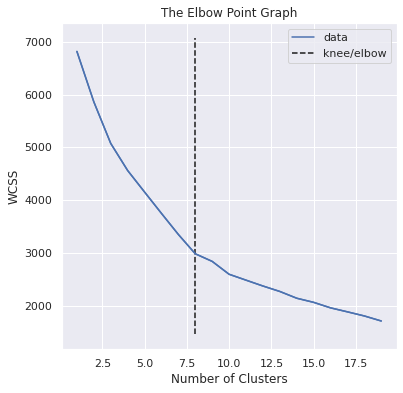

In [ ]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

#Data
X = data.iloc[:,:].values

#Cluster by wcss method
wcss = []
for i in range(1,20):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

#Plot graph
kneedle = KneeLocator(range(1,20),wcss,curve='convex', direction='decreasing')
kneedle.plot_knee()
sns.set()
plt.plot(range(1,20), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.show()

In [ ]:
kneedle.elbow

8

In [ ]:
kmeans = KMeans(n_clusters=9, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[1 1 0 1 1 2 0 2 0 2 0 8 0 0 1 1 2 0 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 5 5 5 5 5 5 5 5 5 5 5 5 5]


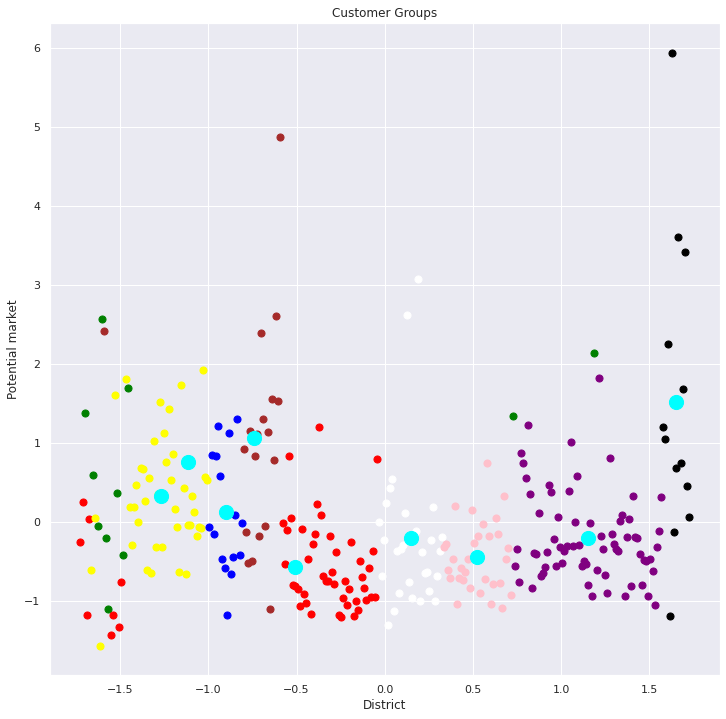

In [ ]:
plt.figure(figsize=(12,12))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='Purple', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')
plt.scatter(X[Y==5,0], X[Y==5,1], s=50, c='black', label='Cluster 6')
plt.scatter(X[Y==6,0], X[Y==6,1], s=50, c='white', label='Cluster 7')
plt.scatter(X[Y==7,0], X[Y==7,1], s=50, c='pink', label='Cluster 8')
plt.scatter(X[Y==8,0], X[Y==8,1], s=50, c='Brown', label='Cluster 9')
#plt.scatter(X[Y==9,0], X[Y==9,1], s=50, c='orange', label='Cluster 10')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('District')
plt.ylabel('Potential market')
plt.show()